In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

plt.rcParams['figure.figsize']=(14,8)
plt.rcParams['figure.dpi']=128
plt.rcParams['font.size']=16



# RPDBCS 2020 CONVNET - triplet loss - domain adaptation

- [results/mixstyle.csv](https://wandb.ai/lucashsmello/coral_vibnet/groups/Mar18_00-31-34/workspace?workspace=user-lucashsmello): Aplicou-se mixstyle logo apos as duas primeiras camadas convolucionais.
- [results/coral_loss/results_coral-16-03-2022.csv](https://wandb.ai/lucashsmello/coral_vibnet/groups/Mar16_10-16-04/workspace?workspace=user-lucashsmello): Aplicou-se coral loss na camada final de features. Testou-se 3 lambdas: 1, 100 e 0 (0 significa que não tem coral loss).
- [results/barlow_twins/17-03-2022.csv](https://wandb.ai/lucashsmello/coral_vibnet/groups/Mar17_14-38-34/workspace?workspace=user-lucashsmello): Aplicou-se barlow twins na última camada de features. Testou-se vários lambdas.
- [results/barlow_twins/bw-31-03-2022.csv](https://wandb.ai/lucashsmello/coral_vibnet/groups/Apr01_01-13-44/workspace?workspace=user-lucashsmello): Barlow twins somado: um na classe normal e uma vez em todas as outras classes.


## results/bw-31-03-2022.csv

Macro F-measure
d_percentage is_trained lamb finetunning_on                 
0.25         False      0.0  True                   0.477099
                        1.0  False                  0.584316
                             True                   0.352220
                        10.0 True                   0.331853
             True       0.0  True                   0.591448
                        1.0  False                  0.621537
                             True                   0.621109
                        10.0 True                   0.618887
0.50         False      0.0  True                   0.567834
                        1.0  False                  0.712393
                             True                   0.393913
                        10.0 True                   0.401026
             True       0.0  True                   0.840166
                        1.0  False                  0.852615
                             True                   0.827964
                        10.0 True                   0.827203
1.00         False      0.0  True                   0.669617
                        1.0  False                  0.781512
                             True                   0.452887
                        10.0 True                   0.469812
             True       0.0  True                   0.848692
                        1.0  False                  0.875749
                             True                   0.854478
                        10.0 True                   0.870255

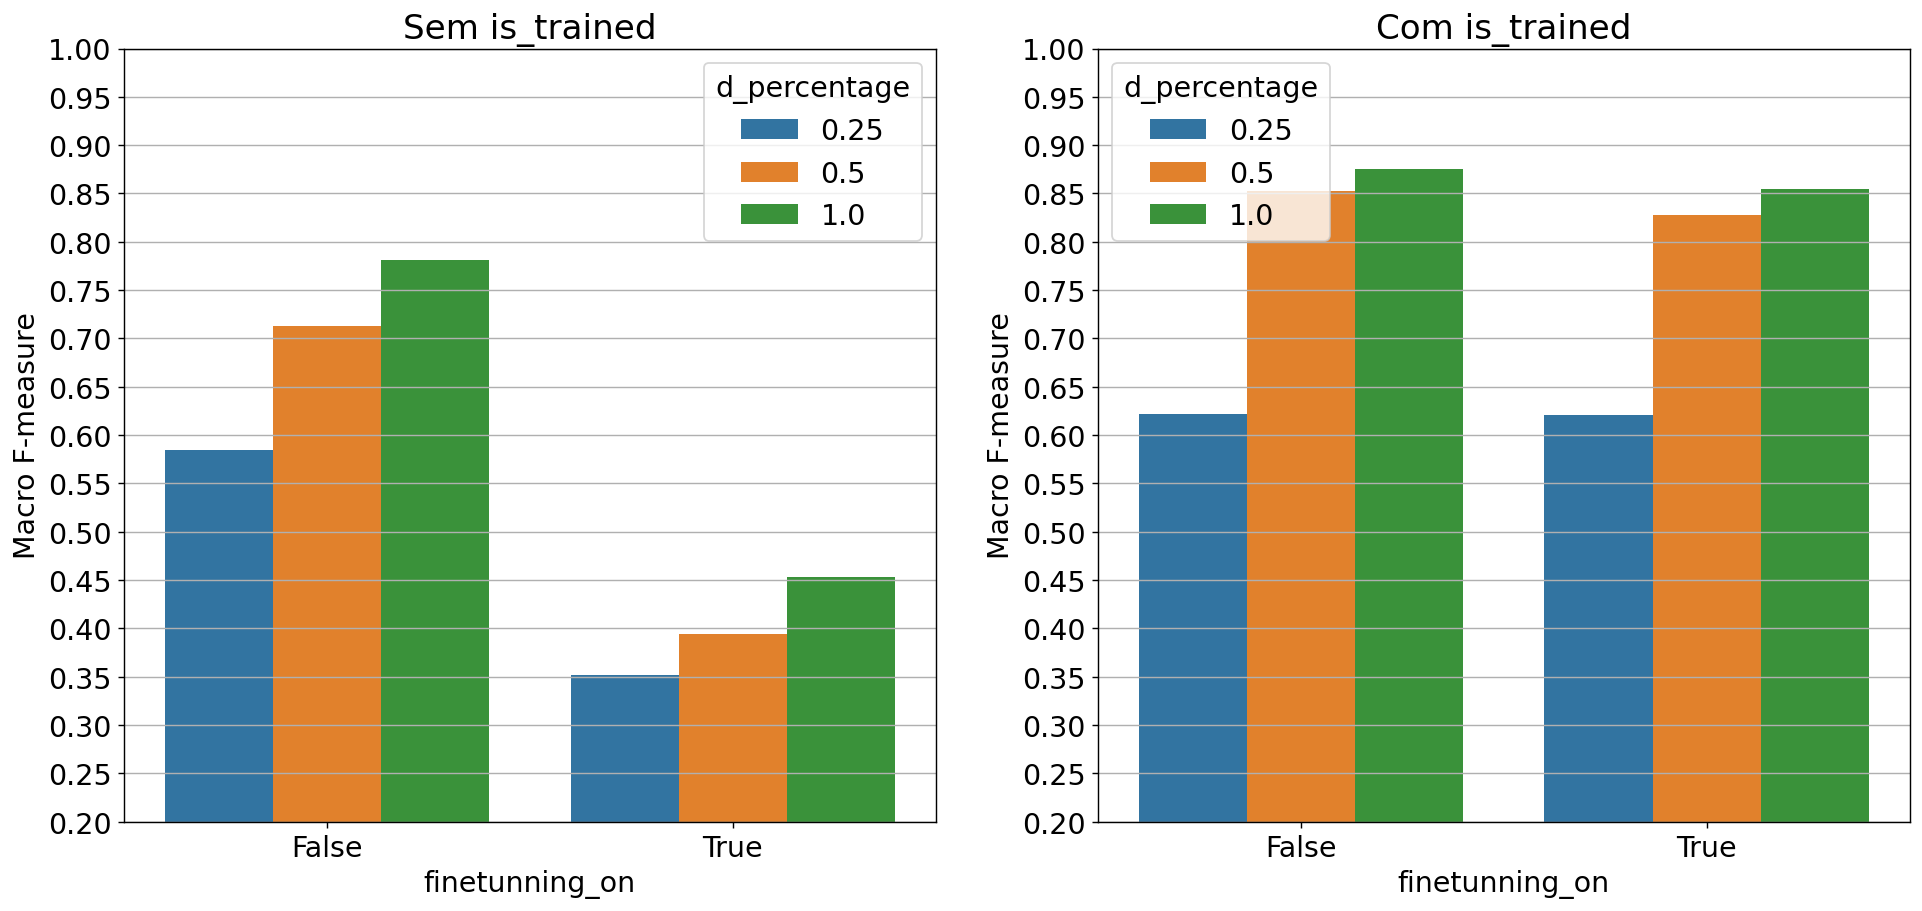

In [22]:
results_filepath = '../results/barlow_twins/bw-31-03-2022.csv'
df = pd.read_csv(results_filepath)
df = df.rename({'value':'Macro F-measure'},axis=1)

hue = 'd_percentage'

_, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 8))

x_axis = 'finetunning_on'
attr1 = 'is_trained'

mask = df[attr1] == False
mask &= df['test_sample'] == 'test'
mask &= df['lamb'] == 1.0
mask2 = df[attr1] == True
mask2 &= df['test_sample'] == 'test'
mask2 &= df['lamb'] == 1.0

display(df[df['test_sample'] == 'test'].groupby(['d_percentage','is_trained','lamb','finetunning_on']).mean())

sns.barplot(data=df[mask], x=x_axis, y='Macro F-measure', hue=hue, ax=ax1)
ax1.grid(axis='y')
ax1.set_ylim([0.2, 1])
ax1.set_title("Sem %s" % attr1)
ax1.set_yticks(np.linspace(0.2,1.0,17));

sns.barplot(data=df[mask2], x=x_axis, y='Macro F-measure', hue=hue, ax=ax2)
ax2.grid(axis='y')
ax2.set_ylim([0.2, 1])
ax2.set_title("Com %s" % attr1);
ax2.set_yticks(np.linspace(0.2,1.0,17));

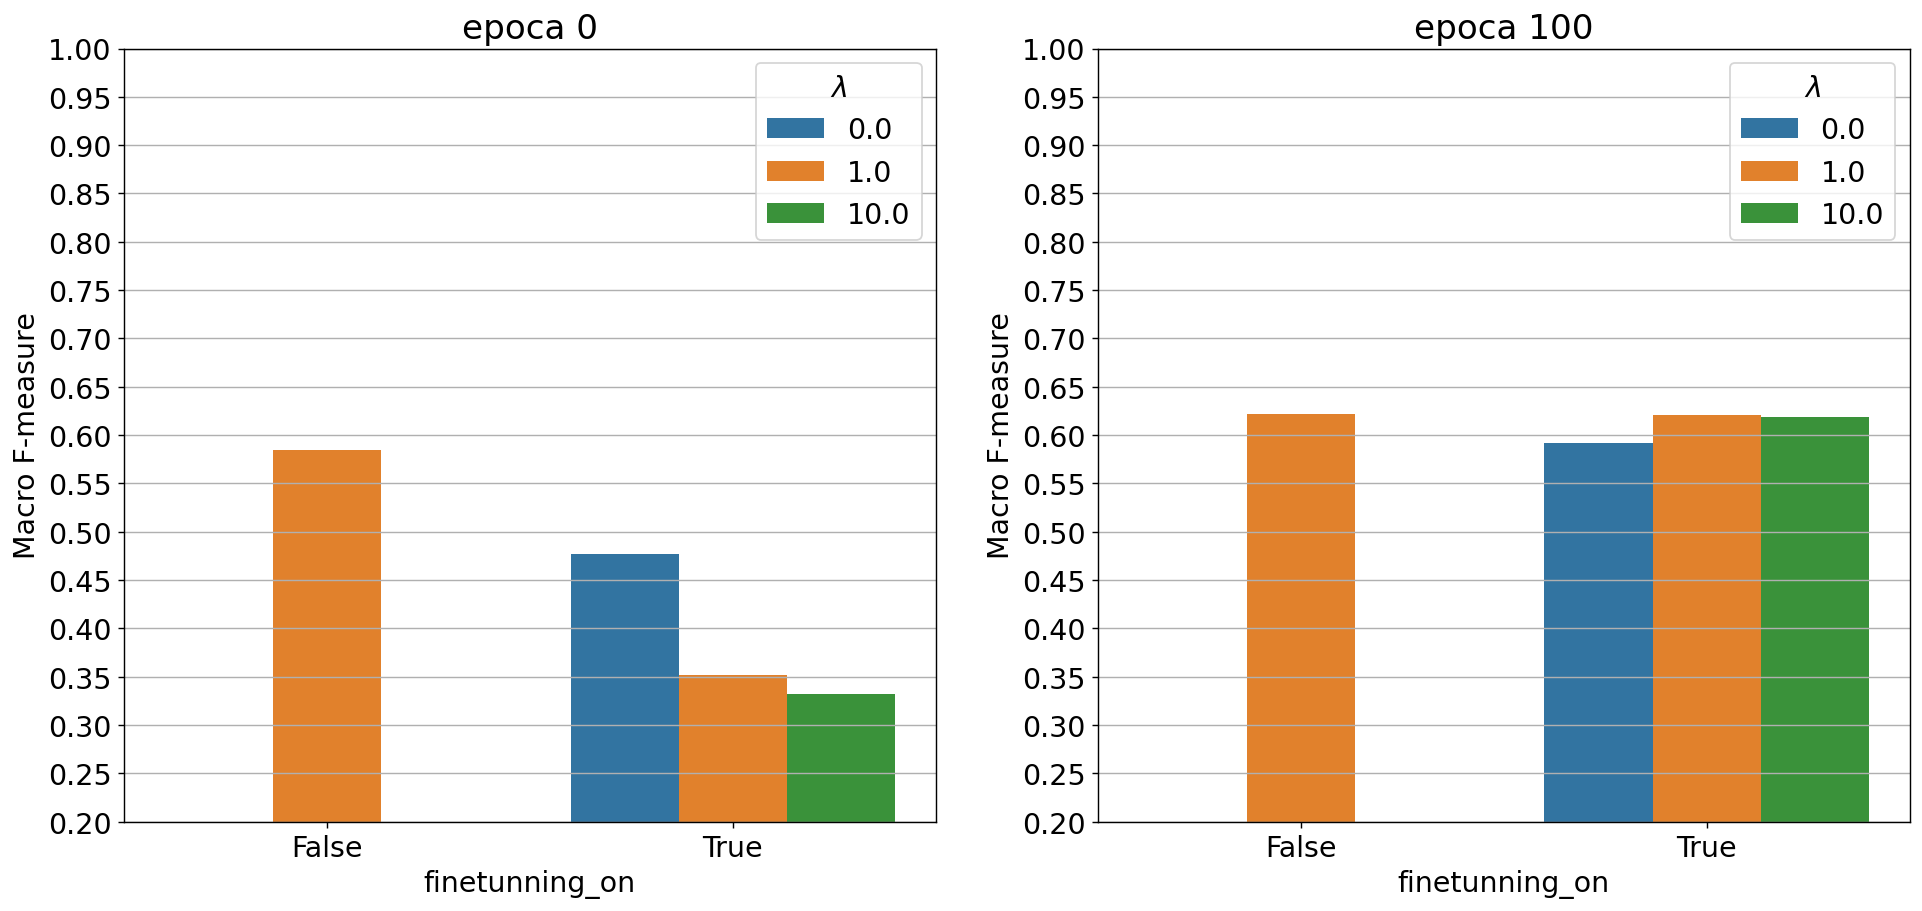

In [29]:
results_filepath = '../results/barlow_twins/bw-31-03-2022.csv'
df = pd.read_csv(results_filepath)
df = df.rename({'lamb':'$\lambda$'},axis=1)
df = df.rename({'value':'Macro F-measure'},axis=1)

hue = '$\lambda$'

_, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 8))

x_axis = 'finetunning_on'
attr1 = 'is_trained'

mask = df[attr1] == False
mask &= df['test_sample'] == 'test'
mask &= df['d_percentage'] == 0.25
mask2 = df[attr1] == True
mask2 &= df['test_sample'] == 'test'
mask2 &= df['d_percentage'] == 0.25


sns.barplot(data=df[mask], x=x_axis, y='Macro F-measure', hue=hue, ax=ax1)
ax1.grid(axis='y')
ax1.set_ylim([0.2, 1])
ax1.set_title("epoca 0")
ax1.set_yticks(np.linspace(0.2,1.0,17));

sns.barplot(data=df[mask2], x=x_axis, y='Macro F-measure', hue=hue, ax=ax2)
ax2.grid(axis='y')
ax2.set_ylim([0.2, 1])
ax2.set_title("epoca 100");
ax2.set_yticks(np.linspace(0.2,1.0,17));

Barlow twins ajuda a diminuir o reconhecimento de domínio e melhor o finetunning, mas não o suficiente para ficar melhor do que fazer sem finetunning.

## results/barlow_twins/bw1.csv

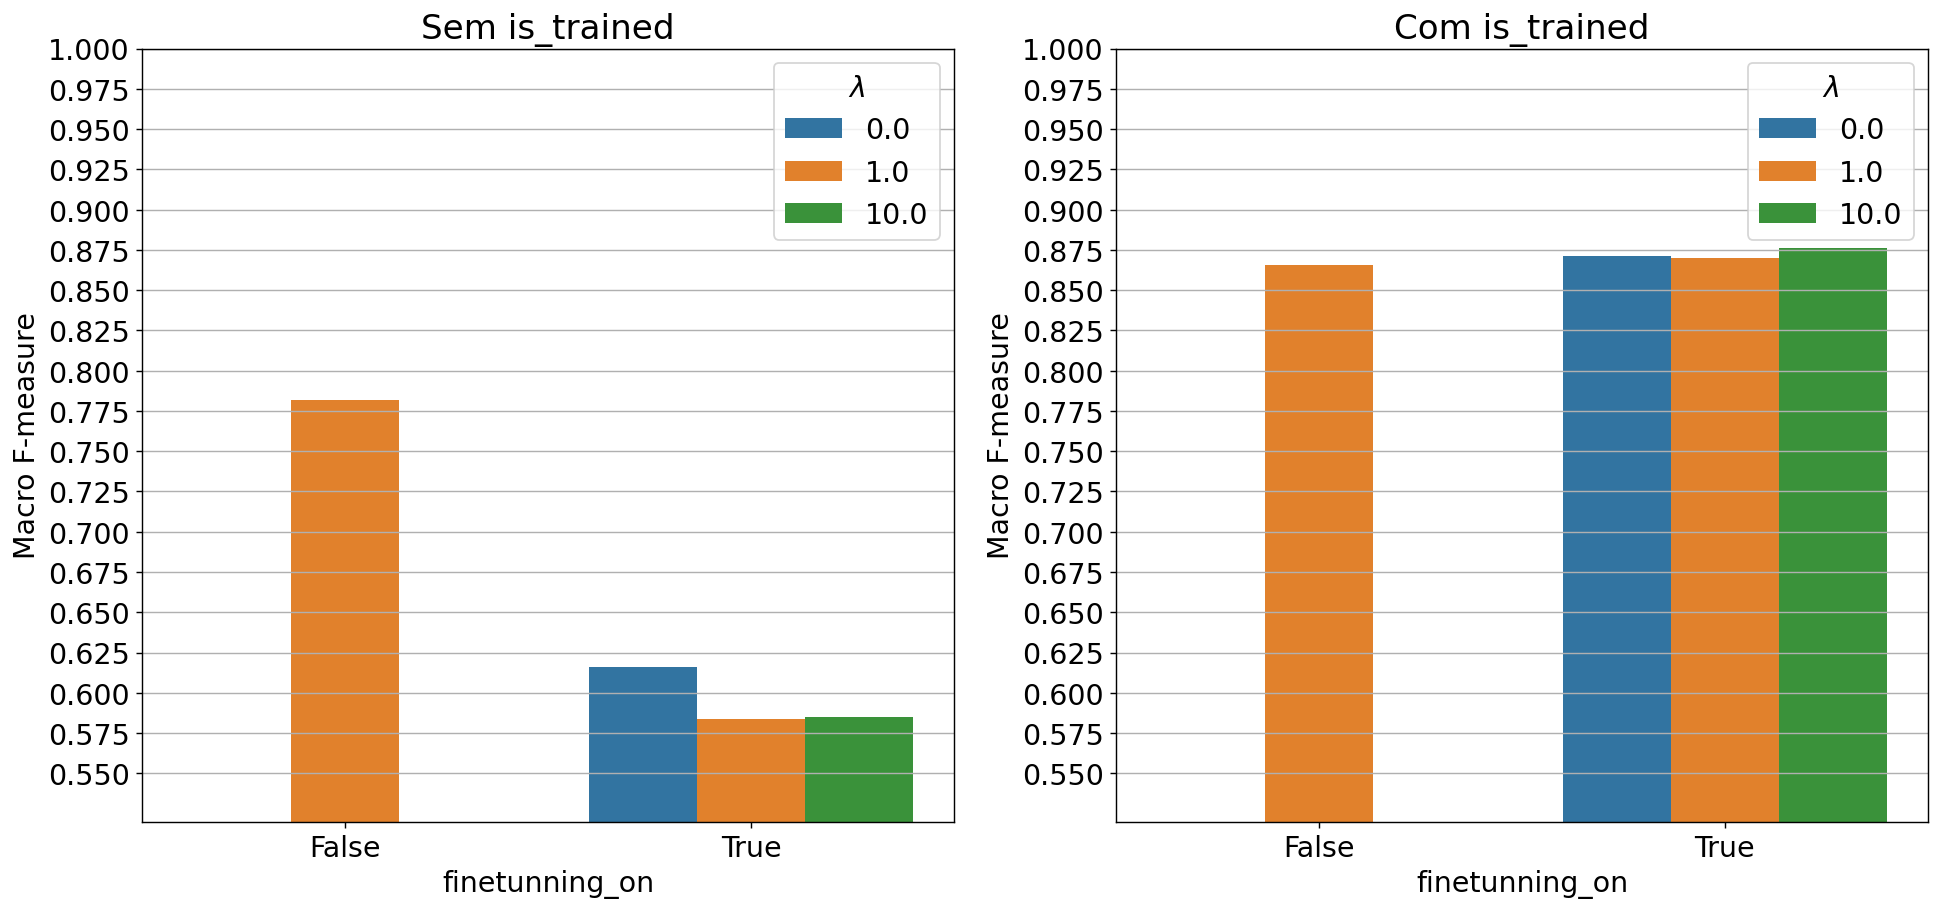

In [69]:
results_filepath = '../results/barlow_twins/bw1.csv'
df = pd.read_csv(results_filepath)
df = df.rename({'lamb':'$\lambda$'},axis=1)
df = df.rename({'value':'Macro F-measure'},axis=1)

hue = '$\lambda$'

_, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 8))

x_axis = 'finetunning_on'
attr1 = 'is_trained'

mask = df[attr1] == False
mask &= df['test_sample'] == 'test'
mask2 = df[attr1] == True
mask2 &= df['test_sample'] == 'test'


sns.barplot(data=df[mask], x=x_axis, y='Macro F-measure', hue=hue, ax=ax1)
ax1.grid(axis='y')
ax1.set_ylim([0.52, 1])
ax1.set_title("Sem %s" % attr1)
ax1.set_yticks(np.linspace(0.55,1.0,19))

sns.barplot(data=df[mask2], x=x_axis, y='Macro F-measure', hue=hue, ax=ax2)
ax2.grid(axis='y')
ax2.set_ylim([0.52, 1])
ax2.set_title("Com %s" % attr1);
ax2.set_yticks(np.linspace(0.55,1.0,19));

In [16]:
mask = df['target_dataset']=='rpdbcs'
mask &= df['test_sample']=='test'
df[mask].groupby(['source_dataset','target_dataset','test_sample','d_percentage','finetunning_on','is_trained','gradient_rev_lambda']).mean()

value
source_dataset   target_dataset test_sample d_percentage finetunning_on is_trained gradient_rev_lambda          
mfpt+cwru+UOC+pu rpdbcs         test        0.75         True           False      0.0                  0.572137
                                                                                   1.0                  0.572137
                                                                        True       0.0                  0.767402
                                                                                   1.0                  0.760643
none             rpdbcs         test        0.75         False          False      0.0                  0.726459
                                                                                   1.0                  0.727515
                                                                        True       0.0                  0.840876
                                                                                   1.0                  0.806309

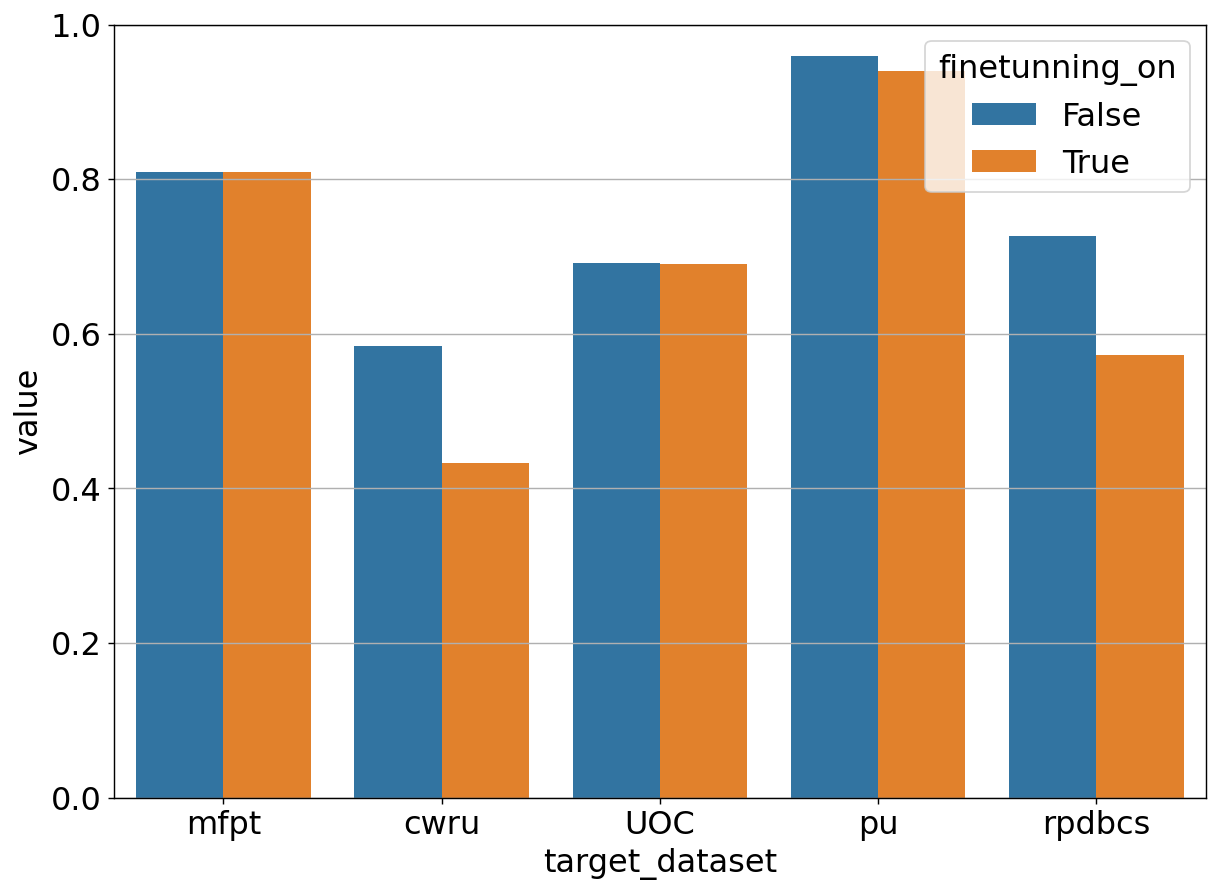

In [38]:
results_filepath = '../results.csv'
df = pd.read_csv(results_filepath)
# df = pd.read_csv('../results/results_16-02-2022_metricnet-with-heads.csv')
# df = pd.read_csv('../results/results_17-02-2022_samplerate-norm.csv')
# df = pd.read_csv('../results/results_10-02-2022.csv')

_,ax1 = plt.subplots(1,1,figsize=(11,8))

# mask2 = df['finetunning_on']==True
mask2 = df['gradient_rev_lambda'] == 0.0
mask2 &= df['is_trained'] == False
mask2&= df['test_sample']=='test'


sns.barplot(data=df[mask2],x='target_dataset',y='value',hue='finetunning_on',ax=ax1); ax1.grid(axis='y'); ax1.set_ylim([0,1]);
# ax1.set_title("Com Finetunning");

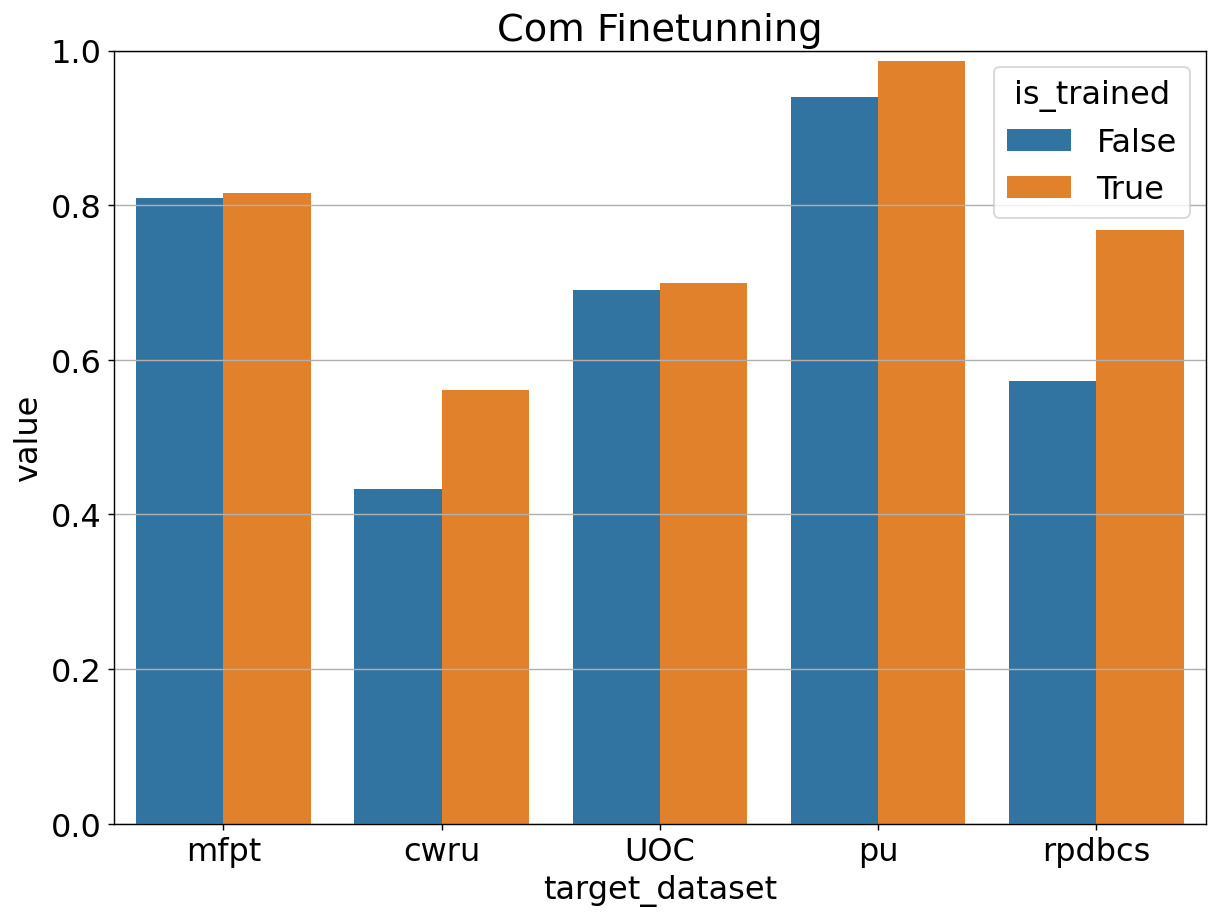

In [37]:
results_filepath = '../results.csv'
df = pd.read_csv(results_filepath)
# df = pd.read_csv('../results/results_16-02-2022_metricnet-with-heads.csv')
# df = pd.read_csv('../results/results_17-02-2022_samplerate-norm.csv')
# df = pd.read_csv('../results/results_10-02-2022.csv')

_,ax1 = plt.subplots(1,1,figsize=(11,8))

mask2 = df['finetunning_on']==True
mask2 &= df['is_trained'] == True
mask2 &= df['test_sample']=='test'


sns.barplot(data=df[mask2],x='target_dataset',y='value',hue='gradient_rev_lambda',ax=ax1); ax1.grid(axis='y'); ax1.set_ylim([0,1]);
ax1.set_title("Com Finetunning");